# Hotel Booking Cancallation Prediction

**Load Data**

Load Hotel_Booking/hotel_bookings.csv file provided on Brightspace.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Read file from google drive
df = pd.read_csv('/content/drive/MyDrive/hotel_bookings.csv')
df.head()

Mounted at /content/drive


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# 1. Data Pre-processing (25%)


---






**Drop irrelevant columns**

It will significantly reduce the time and effort you need to invest. As a general guideline, columns containing IDs, dates, or irrelevant information are typically considered redundant and offer little value for predictive analysis.

In [ ]:
# Drop date columns
date_columns = [col for col in df.columns if 'date' in col.lower()]
df = df.drop(columns=date_columns)
df.head()

# Drop other columns like travel agent as it isnt relevant
df = df.drop(columns=['agent'])

df = df.drop(columns=['country'])


## 1.1 Missing Values (10%)

Identify and handle missing values.

In [ ]:
# See which columns include null values
print(df.isnull().sum())

# For children replace null value with 0
df['children'] = df['children'].fillna(0)

# If percent of null values is too high then will drop the column
null_percentage = df.isnull().sum() / len(df) * 100
print(null_percentage)

columns_to_drop = null_percentage[null_percentage > 50].index.tolist()
print(columns_to_drop)

# Drop columns with more than 50% null values
df = df.drop(columns=columns_to_drop)

# For agent replace null with 0
# df['agent'] = df['agent'].fillna(0)

# For company replace null with 0
# df['company'] = df['company'].fillna(0)

# # Replace null values in country with UNK
# df['country'] = df['country'].fillna('UNK')

# Check if null has been removed
print(df.isnull().sum())


hotel                                  0
is_canceled                            0
lead_time                              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_stat

## Unique values

Find out unique values in columns. This will help you in identifying in-consistent data.

In [ ]:
# Loop through each column
for column in df.columns:
    # Check if the column is adr
    if column in ['adr']:
        # Sort number columns
        unique_values = df[column].unique()
        print("Unique values in", column, "column:")
        print(sorted(unique_values))
    else:
        # For all other columns get unique values
        unique_values = df[column].unique()
        print("Unique values in", column, "column:")
        print(unique_values)

    print("\n")

Unique values in hotel column:
['Resort Hotel' 'City Hotel']


Unique values in is_canceled column:
[0 1]


Unique values in lead_time column:
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 1

## 1.2 Removing Inconsistent values and Outliers (10%)

Detecting inconsistencies can be achieved through a variety of methods. Some can be identified by examining unique values within each column, while others may require a solid understanding of the problem domain. Since you might not be an expert in the hotel or hospitality industry, here are some helpful hints:

Hints:

1. Check for incomplete bookings, such as reservations with zero adults, babies, or children.
2. Examine rows with zeros in both 'stays_in_weekend_nights' and 'stays_in_week_nights.'



Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')
Initial shape of the dataset: (119390, 24)

Count of incomplete bookings before removal: 180
Count of incomplete bookings after removal: 0

Count of zero night stays before removal: 645
Count of zero night stays after removal: 0

Count of negative ADR before removal: 1
Count of negative ADR after removal: 0

Count of too high ADR before removal: 1
Count of too high ADR after removal: 0

Final shape of the dataset after removing all inconsistencies: (118563,

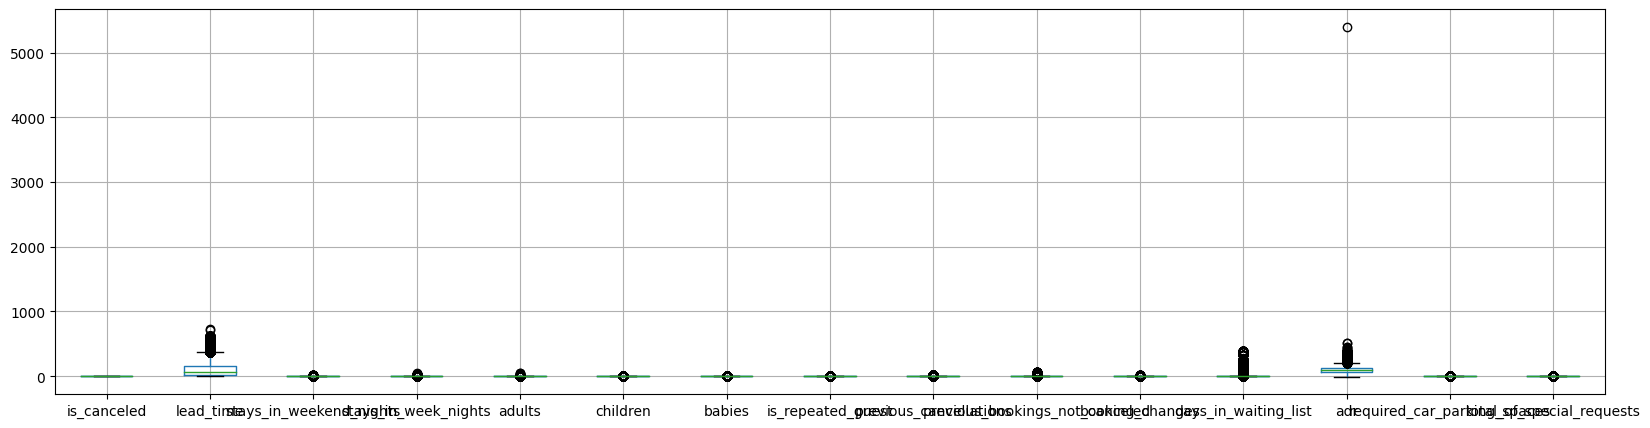

In [ ]:
# Before box
df.boxplot(figsize=(20, 5))
print(df.columns)

# Print shape of the dataset
print("Initial shape of the dataset:", df.shape)

# Bookings with no adults no children no babies
incomplete_bookings = (df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)
print("\nCount of incomplete bookings before removal:", incomplete_bookings.sum())
df = df[incomplete_bookings == False]
print("Count of incomplete bookings after removal:", ((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)).sum())

# # Bookings with no adults only children or babies
# only_children_or_babies = (df['adults'] == 0) & ((df['children'] > 0) | (df['babies'] > 0))
# print("\nCount of incomplete bookings (no adults) before removal:", only_children_or_babies.sum())
# df = df[only_children_or_babies == False]
# print("Count of bookings with only children or babies after removal:", ((df['adults'] == 0) & ((df['children'] > 0) | (df['babies'] > 0))).sum())

# Zero night stays
zero_stay_bookings = (df['stays_in_weekend_nights'] == 0) & (df['stays_in_week_nights'] == 0)
print("\nCount of zero night stays before removal:", zero_stay_bookings.sum())
df = df[zero_stay_bookings == False]
print("Count of zero night stays after removal:", ((df['stays_in_weekend_nights'] == 0) & (df['stays_in_week_nights'] == 0)).sum())

# Negative ADR
invalid_adr = df['adr'] < 0
print("\nCount of negative ADR before removal:", invalid_adr.sum())
df = df[invalid_adr == False]
print("Count of negative ADR after removal:", (df['adr'] < 0).sum())

# Too high ADR
high_adr = df['adr'] > 1000
print("\nCount of too high ADR before removal:", high_adr.sum())
df = df[high_adr == False]
print("Count of too high ADR after removal:", (df['adr'] > 1000).sum())

# Final shape comparison
print("\nFinal shape of the dataset after removing all inconsistencies:", df.shape)

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

select_columns = ['adr','lead_time','stays_in_weekend_nights','stays_in_week_nights',
                  'previous_bookings_not_canceled','days_in_waiting_list','booking_changes']
for column in select_columns:
    df = remove_outliers(df, column)

# Drop columns with only 0 values
df.drop(df.columns[df.eq(0).all()], axis=1, inplace=True)

<Axes: >

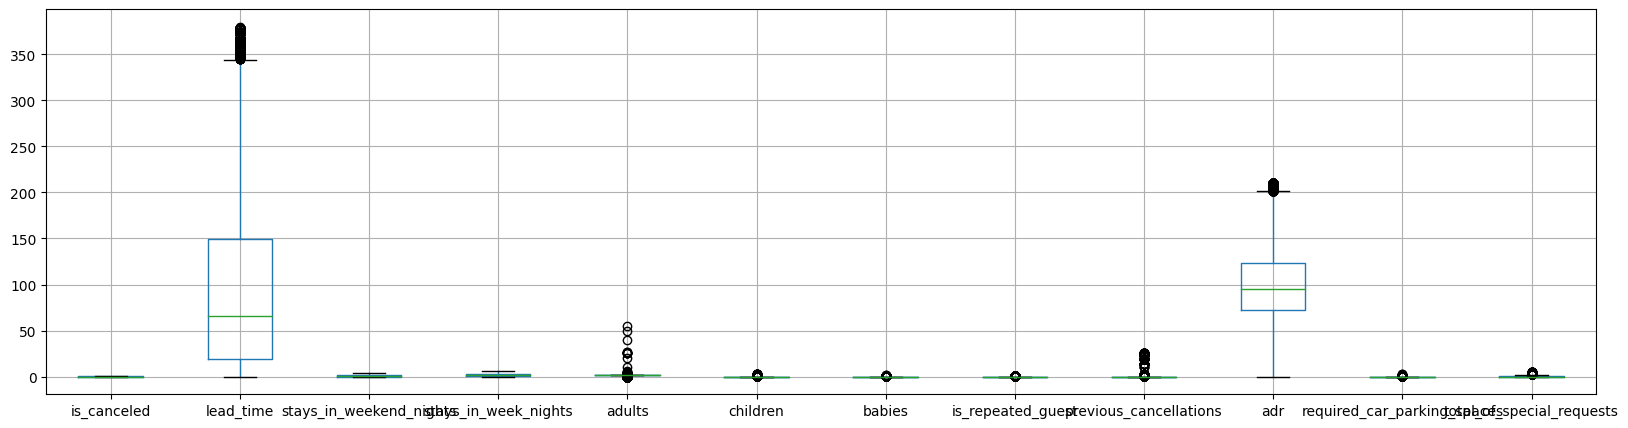

In [ ]:
# After boxplot
df.boxplot(figsize=(20, 5))

<Axes: >

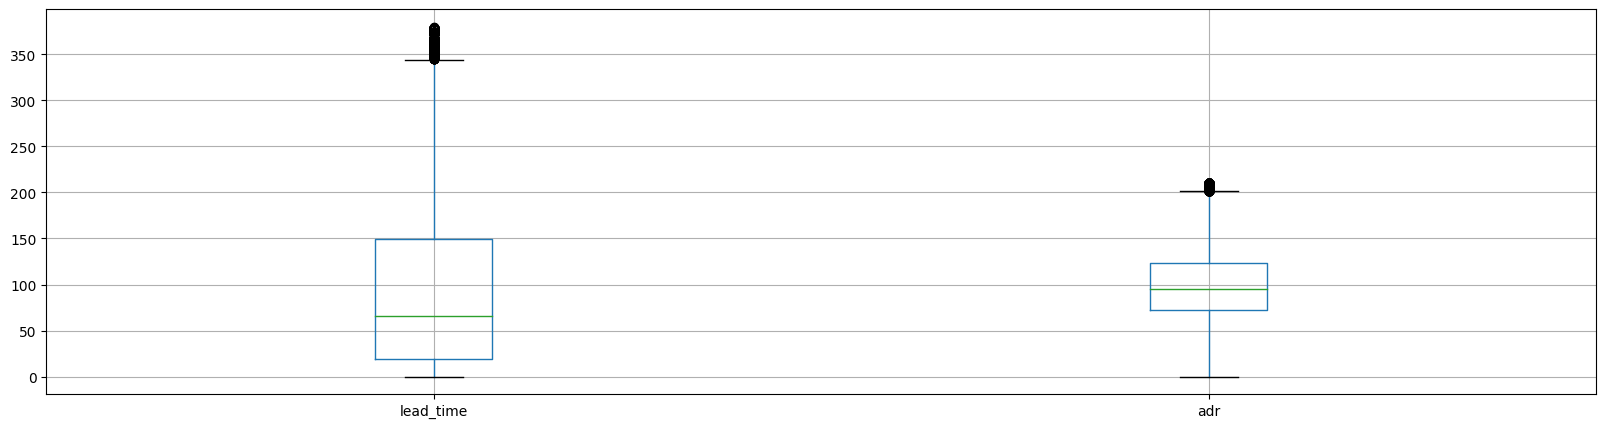

In [ ]:
# adr and lead time box plot
len(df)
df.boxplot(column=['lead_time','adr'],figsize=(20, 5),grid=True)

<Axes: >

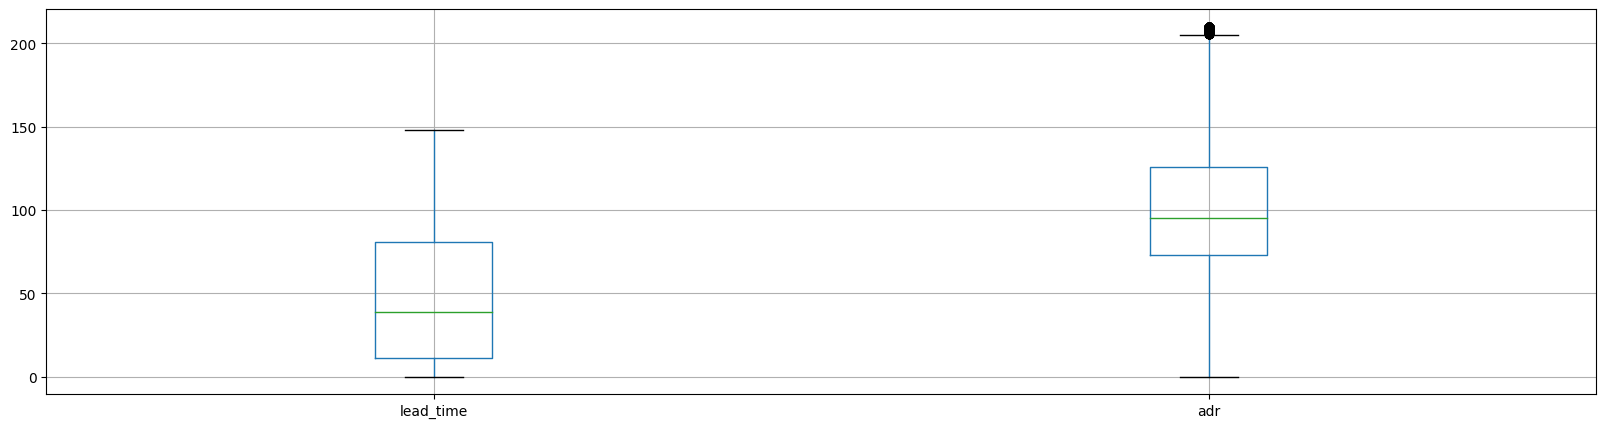

In [ ]:
# adr and lead time box plot after reducing outliers
Q3 = df['lead_time'].quantile(0.75)
df = df[df['lead_time'] < Q3]
df.boxplot(column=['lead_time','adr'],figsize=(20, 5),grid=True)

In [ ]:
# Check all colums are there
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status'],
      dtype='object')


## 1.3 Column data type conversion (5%)

All necessary columns should be correctly converted to appropriate data types.


In [ ]:
# Data types before
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64
children,float64
babies,int64
meal,object
market_segment,object


In [ ]:
# Convert data types and show the result after
df = df.convert_dtypes()
df.dtypes

,0
hotel,string[python]
is_canceled,Int64
lead_time,Int64
stays_in_weekend_nights,Int64
stays_in_week_nights,Int64
adults,Int64
children,Int64
babies,Int64
meal,string[python]
market_segment,string[python]


# 2. Exploratory Data Analysis (25%)


---





You've also been provided with examples of valuable insights that could be of interest to hotel management, including:

* Calculating cancellation percentages for City and Resort hotels.
* Identifying the most frequently ordered meal types.
* Determining the number of returning guests.
* Discovering the most booked room types.
* Exploring correlations between room types and cancellations.


Visualize these insights using three different types of visualizations covered in the practicals, such as:

* Bar graphs
* Pie charts
* Line charts
* Heatmaps

## 2.1. Calculating cancellation percentages for City and Resort hotels.

In [ ]:
# Find cancelation rate per hotel
cancellation_percentage = df.groupby('hotel')['is_canceled'].mean() * 100

# Print cancellation percentages
print("Cancellation percentages for each hotel type:")
print(cancellation_percentage)

cancelled_bookings = df[df['is_canceled'] == 1]
cancelled_bookings = pd.DataFrame(cancelled_bookings[['hotel']].value_counts())
cancelled_bookings = cancelled_bookings.reset_index()
cancelled_bookings.set_index('hotel', inplace=True)

Cancellation percentages for each hotel type:
hotel
City Hotel      36.903234
Resort Hotel    26.635256
Name: is_canceled, dtype: Float64


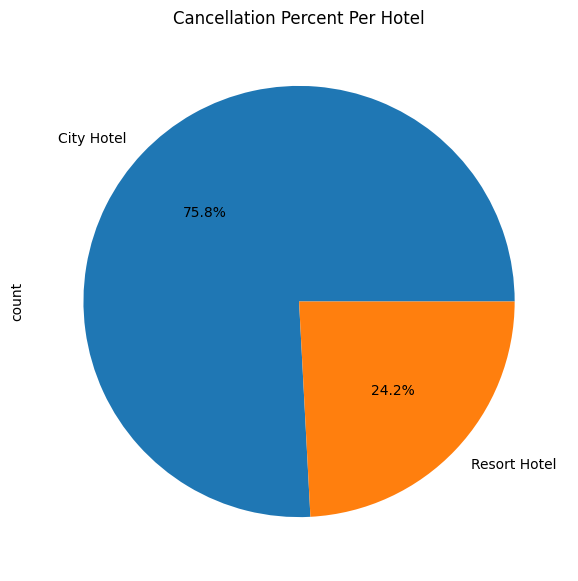

In [ ]:
# Plot pie chart
plot = cancelled_bookings.plot.pie(y='count',figsize=(7,7),title='Cancellation Percent Per Hotel',legend=False,autopct='%1.1f%%')

<Axes: title={'center': 'Cancellations'}, xlabel='hotel', ylabel='Count'>

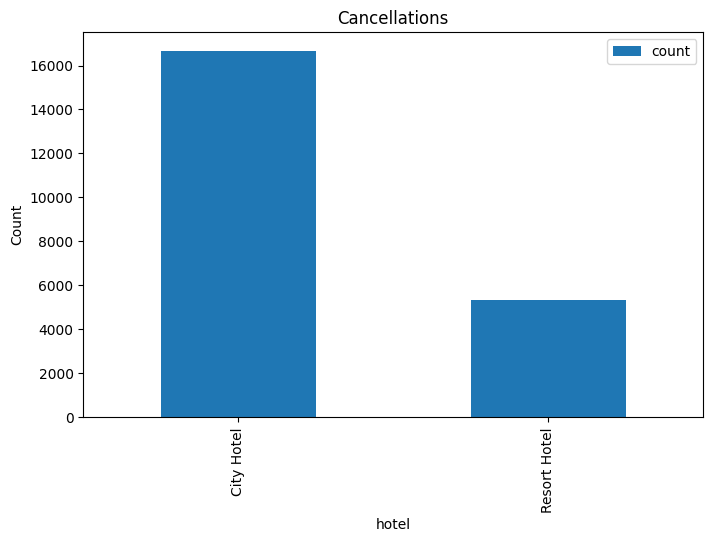

In [ ]:
# Plot bar chart
cancelled_bookings.plot(kind='bar', xlabel='hotel', ylabel='Count', title='Cancellations', figsize=(8, 5))

## 2.2. Identifying the most frequently ordered meal types.

In [ ]:
# Count each meal type
meal_counts = df['meal'].value_counts()

# Display the result
print(meal_counts)

meal
BB           51191
SC            7857
HB            5143
Undefined      560
FB             402
Name: count, dtype: Int64


<Axes: title={'center': 'Meal Types'}, ylabel='count'>

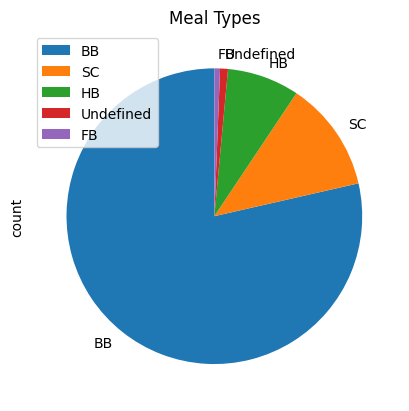

In [ ]:
# Plot pie chart included a box with a key as it is too close
meal_counts.plot(kind='pie', startangle=90, title='Meal Types', legend=True, labels=meal_counts.index)

<Axes: title={'center': 'Most Frequently Ordered Meal Types'}, xlabel='Meal Type', ylabel='Count'>

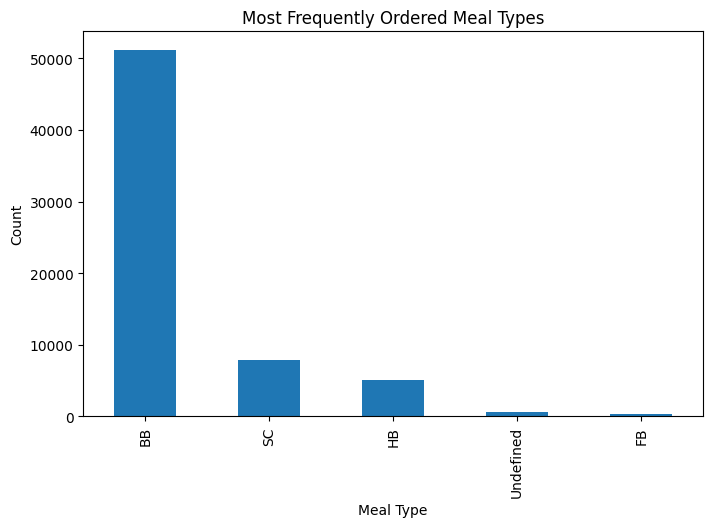

In [ ]:
# Plot bar chart
meal_counts.plot(kind='bar', xlabel='Meal Type', ylabel='Count', title='Most Frequently Ordered Meal Types', figsize=(8, 5))

<Axes: title={'center': 'Most Frequently Ordered Meal Types'}, xlabel='Meal Type', ylabel='Count'>

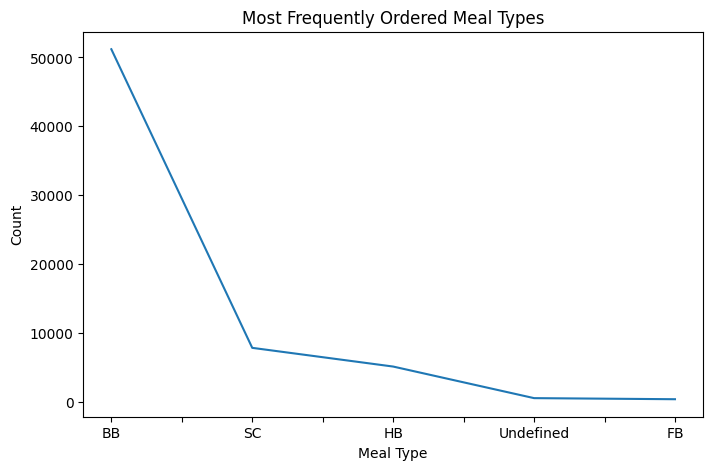

In [ ]:
# Plot line chart
meal_counts.plot(kind='line', xlabel='Meal Type', ylabel='Count', title='Most Frequently Ordered Meal Types', figsize=(8, 5))

## 2.3. Determining the number of returning guests.

In [ ]:
# Count the returning guests and replace with labels AFTER calculating value_counts
num_returning_guests = df['is_repeated_guest'].value_counts()
num_returning_guests = num_returning_guests.replace({0: 'Not Returning', 1: 'Returning'})


# Print the counts
print("Returning guests:")
print(num_returning_guests)


Returning guests:
is_repeated_guest
0    64782
1      371
Name: count, dtype: Int64


is_repeated_guest
0    64782
1      371
Name: count, dtype: Int64


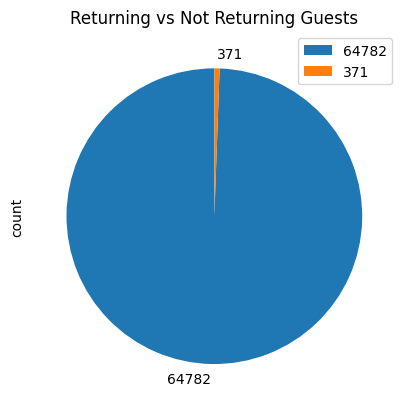

In [ ]:
# Plot pie chart
num_returning_guests.plot(kind='pie', labels=num_returning_guests, startangle=90, title='Returning vs Not Returning Guests', legend=True)
# Print the pie chart data
print(num_returning_guests)

is_repeated_guest
0    64782
1      371
Name: count, dtype: Int64


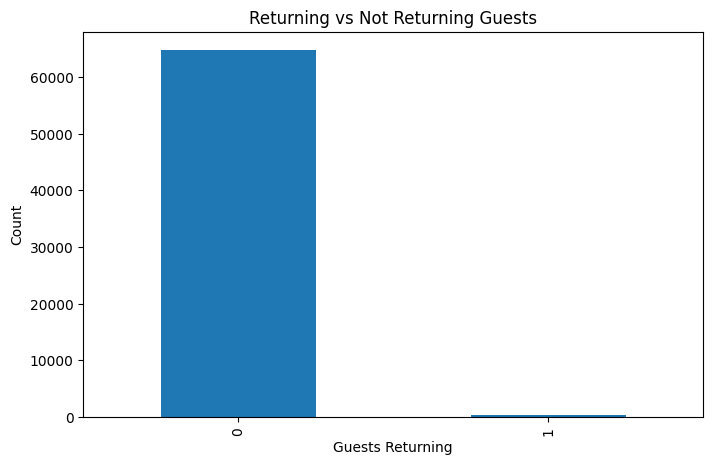

In [ ]:
# Plot bar chart
num_returning_guests.plot(kind='bar', xlabel='Guests Returning', ylabel='Count', title='Returning vs Not Returning Guests', figsize=(8, 5), legend=False)
# Print bar chart data
print(num_returning_guests)

## 2.4. Discovering the most booked room types.

In [ ]:
# Count reserved room type
room_type_counts = df['reserved_room_type'].value_counts()

# Print the result
print("Most booked room types:")
print(room_type_counts)

Most booked room types:
reserved_room_type
A    46537
D    12062
E     3367
F     1373
G      759
B      448
C      373
H      229
L        5
Name: count, dtype: Int64


<Axes: title={'center': 'Most Booked Room Types'}>

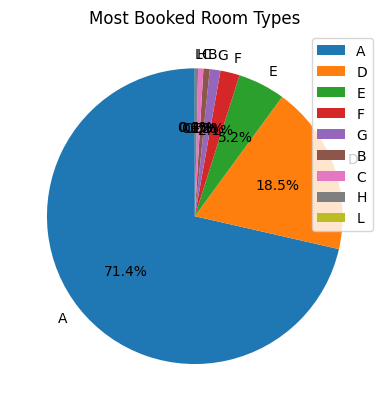

In [ ]:
# Plot a pie chart
room_type_counts.plot(kind='pie', title='Most Booked Room Types', autopct='%1.1f%%', startangle=90, legend=True, ylabel='')

<Axes: title={'center': 'Most Booked Room Types'}, xlabel='Room Type', ylabel='Number of Bookings'>

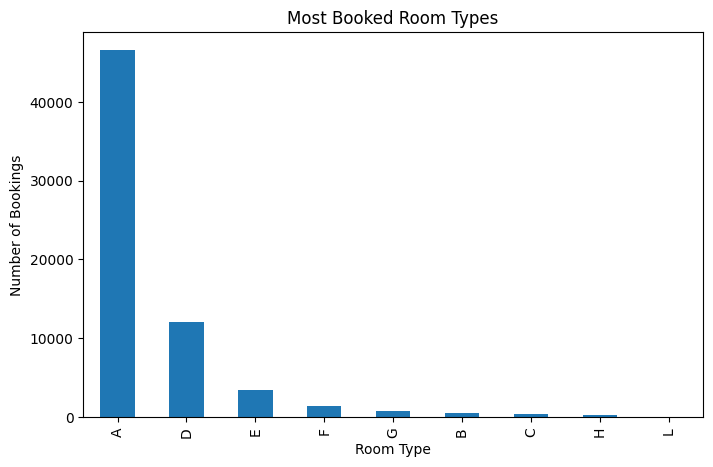

In [ ]:
# Plot a bar chart for the most booked room types
room_type_counts.plot(kind='bar', title='Most Booked Room Types', xlabel='Room Type', ylabel='Number of Bookings', figsize=(8, 5))

<Axes: title={'center': 'Most Booked Room Types'}, xlabel='Room Type', ylabel='Number of Bookings'>

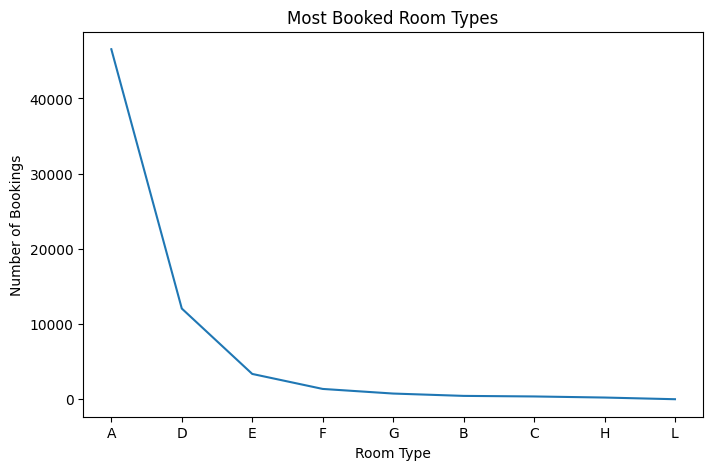

In [ ]:
# Plot a line chart for the most booked room types
room_type_counts.plot(kind='line', title='Most Booked Room Types', xlabel='Room Type', ylabel='Number of Bookings', figsize=(8, 5))

## 2.5. Exploring correlations between room types and cancellations.

In [ ]:
# Select columns
correlation_df = df[['assigned_room_type','is_canceled']]
df_encoded = pd.get_dummies(correlation_df, columns=['assigned_room_type'])

# Create columns for each room type
correlation_matrix = abs(df_encoded.corr())

# drop is_cancelled to focus on other features
is_canceled_correlation = correlation_matrix['is_canceled'].drop('is_canceled')
print(is_canceled_correlation)


assigned_room_type_A    0.154615
assigned_room_type_B    0.041310
assigned_room_type_C    0.047612
assigned_room_type_D    0.100042
assigned_room_type_E    0.047461
assigned_room_type_F    0.039883
assigned_room_type_G    0.016078
assigned_room_type_H    0.000536
assigned_room_type_I    0.022560
assigned_room_type_K    0.018019
Name: is_canceled, dtype: float64


<Axes: title={'center': 'Room Type Cancellation Rate'}>

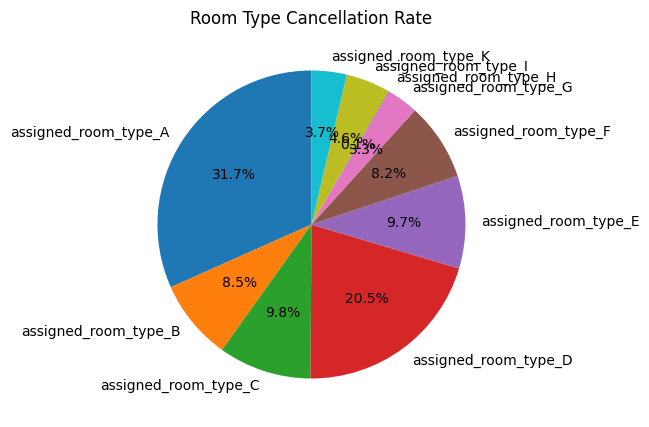

In [ ]:
# Plot a pie chart
is_canceled_correlation.plot(kind='pie',title='Room Type Cancellation Rate',autopct='%1.1f%%',startangle=90,ylabel='', legend=False, figsize=(8, 5))

<Axes: title={'center': 'Correlations Between Room Types And Cancellations'}, xlabel='Room Type', ylabel='Correlation'>

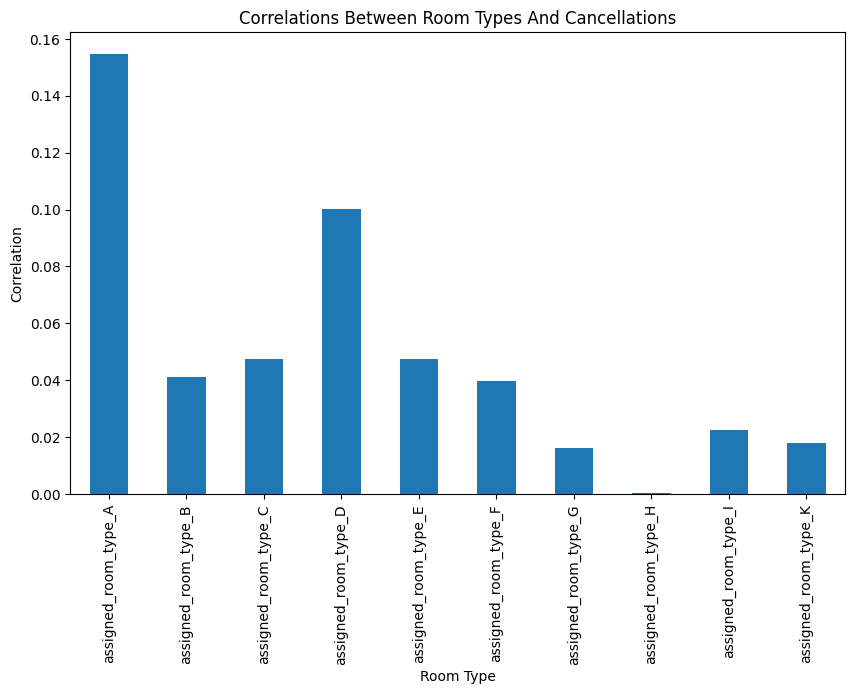

In [ ]:
# Plot a bar chart
is_canceled_correlation.plot(kind='bar', figsize=(10, 6), title='Correlations Between Room Types And Cancellations', xlabel='Room Type',ylabel='Correlation')

# 3. Feature Engineering (20%)


---





Apply various feature engineering techniques, covered in the lectures and practicals.

Hint:
* Binning
* Encoding
* Scaling
* Feature selection

## 3.1. Binning

In [ ]:
# Bins for lead_time
print(df.columns)
bins = [0, 30, 90, 180, 540]
labels = ['Short', 'Medium', 'Long', 'Very Long']

# Colum lead_time_binned
df['lead_time_binned'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=False)

# Check the result
df[['lead_time', 'lead_time_binned']].head()
df.drop(['lead_time'], axis=1, inplace=True)


Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status'],
      dtype='object')


In [ ]:
# Bins for ADR
adr_bins = [0, 100, 200, 300, 600]
adr_labels = ['Low', 'Medium', 'High', 'Very High']

# Column adr_binned
df['adr_binned'] = pd.cut(df['adr'], bins=adr_bins, labels=adr_labels, right=False)

# Check the result
df[['adr', 'adr_binned']].head()
df.drop(['adr'], axis=1, inplace=True)

## 3.2. Encoding

In [ ]:
# One hot encoding

# Print colums to check
print(df.columns)

# Define the columns to one-hot encode
columns_to_encode = ['reservation_status', 'deposit_type', 'customer_type']

# Loop through each column and perform one-hot encoding
for column in columns_to_encode:
    one_hot = pd.get_dummies(df[column], prefix=column)
    df = df.drop(column, axis=1)
    df = df.join(one_hot)

# Display the first few rows of the updated DataFrame
print(df.head)

# Print colums to check
print(df.columns)

Index(['hotel', 'is_canceled', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status', 'lead_time_binned',
       'adr_binned'],
      dtype='object')
<bound method NDFrame.head of                hotel  is_canceled  stays_in_weekend_nights  \
2       Resort Hotel            0                        0   
3       Resort Hotel            0                        0   
4       Resort Hotel            0                        0   
5       Resort Hotel            0                        0   
6       Resort Hotel            0                        0   
...              ...          ...                      ...   
119382    City Hotel            0                        2   
11938

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
oe = OrdinalEncoder()
le = LabelEncoder()

# Ordinal encoding

df['hotel'] = df['hotel'].map({'Resort Hotel': 0, 'City Hotel': 1})
df['meal'] = oe.fit_transform(df[['meal']])
# df['country'] = oe.fit_transform(df[['country']])
df['market_segment'] = oe.fit_transform(df[['market_segment']])
df['distribution_channel'] = oe.fit_transform(df[['distribution_channel']])
df['reserved_room_type'] = oe.fit_transform(df[['reserved_room_type']])
# df['customer_type'] = oe.fit_transform(df[['customer_type']])
# df['reservation_status'] = oe.fit_transform(df[['reservation_status']])


df['assigned_room_type'] = le.fit_transform(df['assigned_room_type'])
# df['deposit_type'] = le.fit_transform(df['deposit_type'])

# print head to test
print(df.head())

print(df['hotel'].unique())
print(df['meal'].unique())
# print(df['country'].unique())
print(df['market_segment'].unique())
print(df['distribution_channel'].unique())
print(df['reserved_room_type'].unique())
print(df['assigned_room_type'].unique())

   hotel  is_canceled  stays_in_weekend_nights  stays_in_week_nights  adults  \
2      0            0                        0                     1       1   
3      0            0                        0                     1       1   
4      0            0                        0                     2       2   
5      0            0                        0                     2       2   
6      0            0                        0                     2       2   

   children  babies  meal  market_segment  distribution_channel  ...  \
2         0       0   0.0             3.0                   1.0  ...   
3         0       0   0.0             2.0                   0.0  ...   
4         0       0   0.0             6.0                   3.0  ...   
5         0       0   0.0             6.0                   3.0  ...   
6         0       0   0.0             3.0                   1.0  ...   

   reservation_status_Canceled  reservation_status_Check-Out  \
2                     

In [ ]:
df['lead_time_binned'] = df['lead_time_binned'].cat.codes
df['adr_binned'] = df['adr_binned'].cat.codes

## 3.3. Scaling

    stays_in_weekend_nights  stays_in_week_nights
2                      0.00              0.166667
3                      0.00              0.166667
4                      0.00              0.333333
5                      0.00              0.333333
6                      0.00              0.333333
7                      0.00              0.333333
8                      0.00              0.500000
9                      0.00              0.500000
10                     0.00              0.666667
11                     0.00              0.666667
12                     0.00              0.666667
14                     0.00              0.666667
15                     0.00              0.666667
16                     0.00              0.666667
17                     0.00              0.166667
18                     0.00              0.166667
19                     0.00              0.666667
20                     0.25              0.666667
24                     0.50              0.833333


Index(['hotel', 'is_canceled', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'reserved_room_type', 'assigned_room_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'lead_time_binned', 'adr_binned', 'reservation_status_Canceled',
       'reservation_status_Check-Out', 'reservation_status_No-Show',
       'deposit_type_No Deposit', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party'],
      dtype='object')

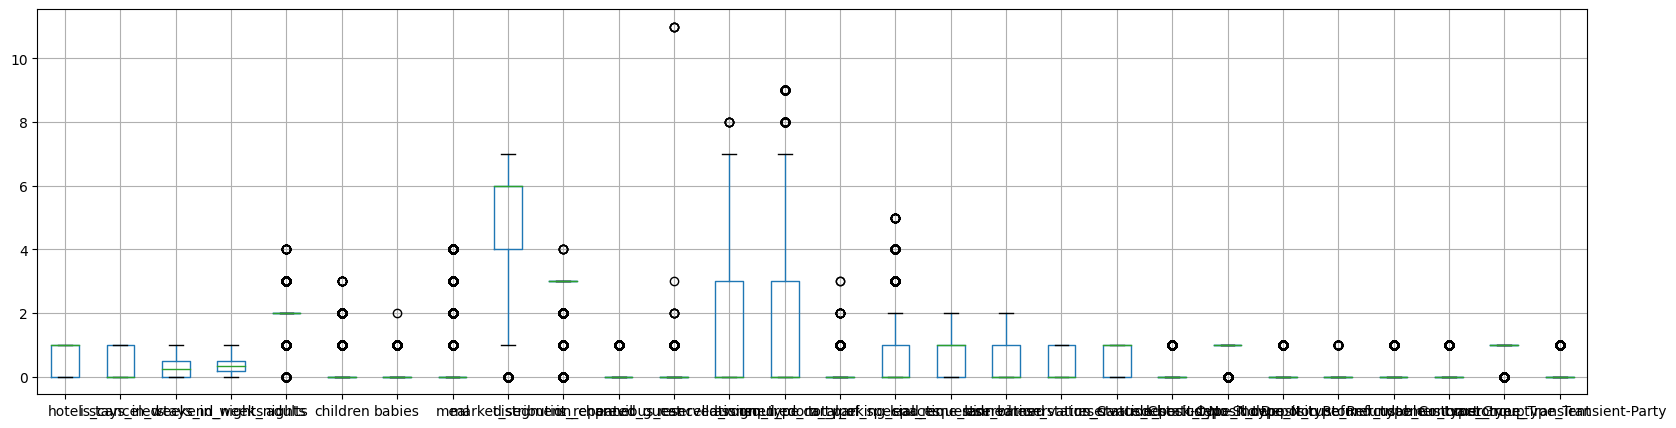

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min max scaler
min_max_scaler = MinMaxScaler()

# Select the columns to scale
columns_to_scale = ['stays_in_weekend_nights'
                    ,'stays_in_week_nights'
                    # ,'days_in_waiting_list'
                    ]

# Apply scaling
df[columns_to_scale] = min_max_scaler.fit_transform(df[columns_to_scale])

# Display the first few rows
print(df[columns_to_scale].head(20))

df.boxplot(figsize=(20, 5))
df.columns

## 3.4. Feature selection

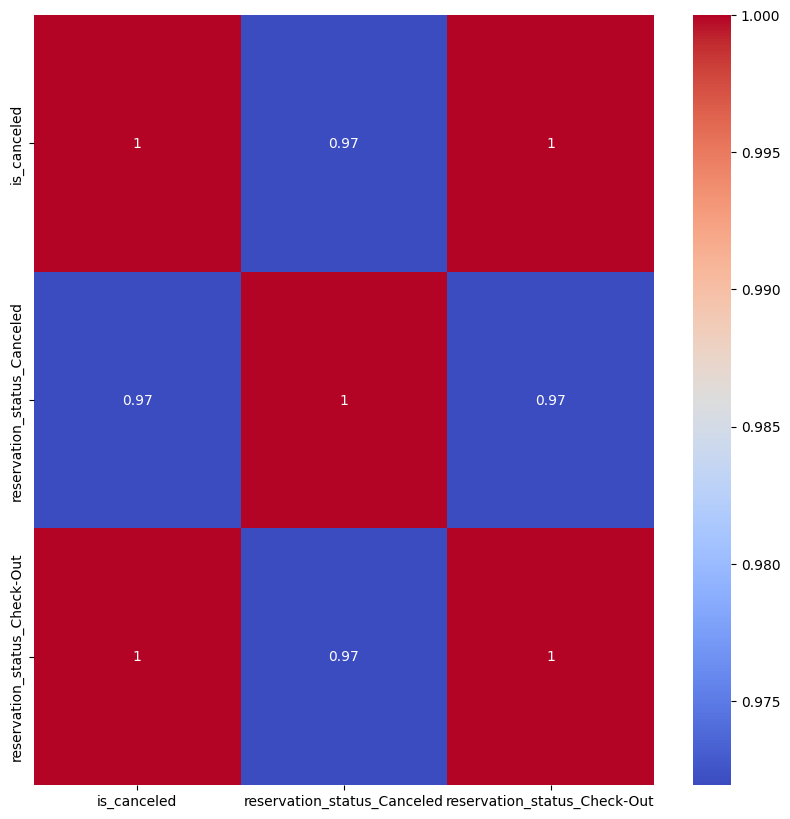

In [ ]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

def feature_selection(strength):
    # Correlation
    target_correlation = abs(df.corr(numeric_only=True)['is_canceled'])

    # Features with a correlation based off strength
    similar_features = target_correlation[target_correlation>strength].index
    return similar_features

# Set the correlation strength threshold
threshold = 0.5
selected_features = feature_selection(threshold)

# Create heatmap
corr_matrix = abs(df[selected_features].corr())
plt.figure(figsize=(10, 10))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# 4. Classifier Training (20%)


---


Utilise the sklearn Python library to train a ML model (e.g.decision tree classifier). Your process should start with splitting your dataset into input features (X) and a target feature (y). Next, divide the data into 70% training and 30% testing subsets. Train your model on the training dataset and evaluate using test dataset with appropriate metrics. Aim to achieve higher accuracy e.g. more than 70% accuracy using your model.

## 4.1. Data Splitting (5%)

In [ ]:
# Split into input x and target y
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x = df.drop(['is_canceled','reservation_status_Canceled','reservation_status_Check-Out'], axis=1)
y = df['is_canceled']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)

## 4.2. Model Training (10%)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def train_evaluate_model(x, y, x_test, y_test):
    # Initialise the tree
    model = DecisionTreeClassifier(random_state=42)
    model.fit(x, y)
    # Make predicitons
    predictions = model.predict(x_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)
    return predictions

## 4.3. Model Evaluation (5%)

In [ ]:
print(df.dtypes)
print(df.head)
print("\n")
predictions = train_evaluate_model(x, y, x_test, y_test)

hotel                              int64
is_canceled                        Int64
stays_in_weekend_nights          float64
stays_in_week_nights             float64
adults                             Int64
children                           Int64
babies                             Int64
meal                             float64
market_segment                   float64
distribution_channel             float64
is_repeated_guest                  Int64
previous_cancellations             Int64
reserved_room_type               float64
assigned_room_type                 int64
required_car_parking_spaces        Int64
total_of_special_requests          Int64
lead_time_binned                    int8
adr_binned                          int8
reservation_status_Canceled      boolean
reservation_status_Check-Out     boolean
reservation_status_No-Show       boolean
deposit_type_No Deposit          boolean
deposit_type_Non Refund          boolean
deposit_type_Refundable          boolean
customer_type_Co

# 5. Feature Importance (10%)


---

Assess the importance of features within your decision tree model. Provide commentary on the reliability of your model's results based on the feature importance scores.

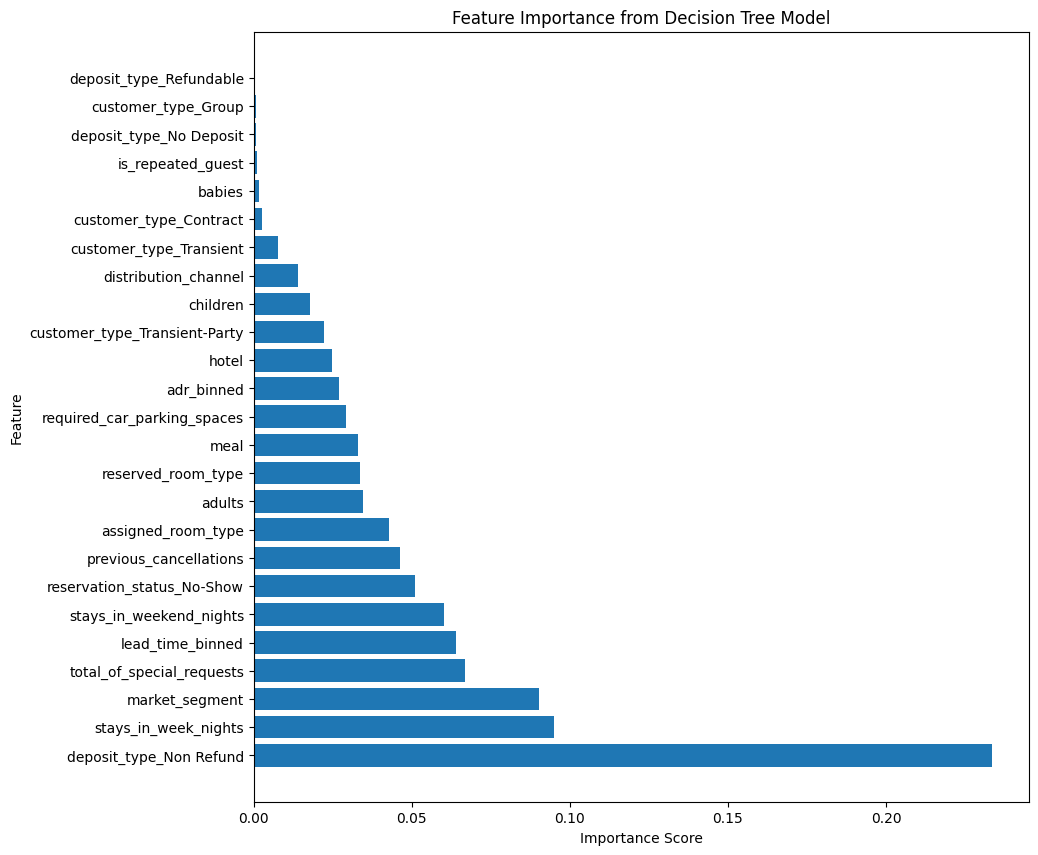

                          Feature  Importance
19        deposit_type_Non Refund    0.233512
2            stays_in_week_nights    0.094967
7                  market_segment    0.090335
14      total_of_special_requests    0.066775
15               lead_time_binned    0.063892
1         stays_in_weekend_nights    0.060054
17     reservation_status_No-Show    0.051002
10         previous_cancellations    0.046267
12             assigned_room_type    0.042855
3                          adults    0.034686
11             reserved_room_type    0.033682
6                            meal    0.033120
13    required_car_parking_spaces    0.029059
16                     adr_binned    0.026916
0                           hotel    0.024876
24  customer_type_Transient-Party    0.022067
4                        children    0.017773
8            distribution_channel    0.013899
23        customer_type_Transient    0.007717
21         customer_type_Contract    0.002491
5                          babies 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Fit Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

# Extract Feature Importance
importance = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance from Decision Tree Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Print feature importance DataFrame
print(feature_importance_df)
print("\n\n From developing the model, the top 3 most important features are:\n")
print(feature_importance_df.head(3))

# Analysis
print("\nThis shows that the customers who pick the deposit type, non refundable, are less likely to cancel the booking.")
print("\nThe second most important feature is stays in week nights meaning guests who stay longer week nights might have more reason to stay in the location and therefore less likely to cancel.")
print("\nThe third most important feature is market segment which shows that different reasons for the customer to stay at the hotel such as corporate reasons may mean they are less likely to cancel.")
print("\nIn conculsion the hotel must look the closes at these top 3 features to optimise booking as this can lead to the least amount of cancellations and more profit.")
